In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *
import seaborn as sns


In [53]:
# age: continuous. 
# workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
# fnlwgt: continuous. 
# education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
# education-num: continuous. 
# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
# sex: Female, Male. 
# capital-gain: continuous. 
# capital-loss: continuous. 
# hours-per-week: continuous. 
# native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
['age','workclass','fnlwgt','education','education-num','mari','occupation','relationship','race','sex','cg','cl','hw','na','5k']
df = pd.read_csv('adult.data', index_col = False,
        names=['age','workclass','fnlwgt','education','education-num','mari','occupation',
               'relationship','race','sex','cg','cl','hw','na','5k'])
df.head()
df.describe()
# df.count()
df.isnull().any()

age              False
workclass        False
fnlwgt           False
education        False
education-num    False
mari             False
occupation       False
relationship     False
race             False
sex              False
cg               False
cl               False
hw               False
na               False
5k               False
dtype: bool

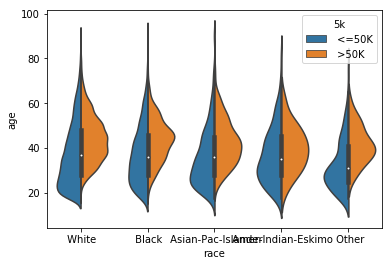

In [54]:
# sns.countplot('5k',hue='sex',data=df)
# sns.heatmap(df.corr(), annot=True, cmap='summer_r', linewidths=0.2)
sns.violinplot('race','age', hue='5k', data=df, split=True)


In [55]:
Y = df['5k'].values.tolist()
Y = [1 if i == ' <=50K' else 0 for i in Y]
Y= to_categorical(Y)
print(Y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [56]:
df.head()
# ['age','fnlwgt','education-num','cg','cl','hw']
X = df.drop(['age','fnlwgt','education-num','cg','cl','hw','5k'], axis=1)
X = pd.get_dummies(X, drop_first=True)
X = pd.concat([X, df[['age','fnlwgt','education-num','cg','cl','hw']]], axis=1)
scaler = MinMaxScaler()
X[['age','fnlwgt','education-num','cg','cl','hw']] = scaler.fit_transform(X[['age','fnlwgt','education-num','cg','cl','hw']])




C:\Users\dodol\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [59]:
X_train = X[:-1000]
X_test = X[-1000:]

Y_train = Y[:-1000]
Y_test = Y[-1000:]

X_train.shape
# X_test.shape

(31561, 100)

In [85]:
model = Sequential()
model.add(Dense(1024,activation='relu', input_shape=(100,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

#adam 이라는 옵티마이저를 많이 사용한다 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, Y_train, epochs=5, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1024)              103424    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 258       
Total params: 694,146
Trainable params: 694,146
Non-trainable params: 0
_________________________________________________________________
Train on 25248 samples, validate on 6313 samples
Epoch 1/5
25248/25248 [==============================] - 15s 576us/step - loss: 0.3564 - acc: 0.8333 - val_loss: 0.3464 - val_acc: 0.8446
Epoch 2/5
25248/25248 [==============================] - 14s 540us/step - loss: 0

Text(0.5, 1.0, 'loss')

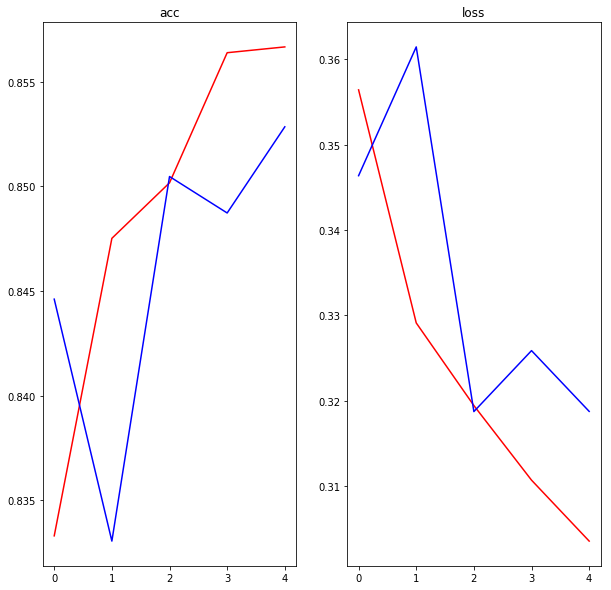

In [86]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(hist.history['acc'], color='r')
plt.plot(hist.history['val_acc'], color='b')
plt.title('acc')

plt.subplot(1,2,2)
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='b')
plt.title('loss')

In [88]:
score = model.evaluate(X_test, Y_test)
pred = model.predict(X_test)


model.get_weights()

1000/1000 [==============================] - 0s 97us/step


[array([[ 0.05155745, -0.05746863,  0.04420027, ...,  0.00321604,
         -0.06176535,  0.04324489],
        [-0.10998186, -0.14290898,  0.06633119, ...,  0.00551178,
         -0.0175522 ,  0.05504064],
        [-0.02772384,  0.04268664, -0.03682583, ..., -0.03299488,
         -0.02492749,  0.08110207],
        ...,
        [ 1.0260855 , -0.4678706 ,  0.18638523, ..., -0.9887783 ,
          0.12806378, -0.03662422],
        [ 0.21041459, -0.04783467, -0.00773458, ..., -0.05570867,
         -0.03285465, -0.10159177],
        [ 0.01273007, -0.0614066 , -0.03767991, ..., -0.1130993 ,
         -0.00198293, -0.05130752]], dtype=float32),
 array([-0.03278187, -0.00174484, -0.05592885, ...,  0.02020612,
        -0.04161041, -0.00238502], dtype=float32),
 array([[ 0.0214547 ,  0.00498134, -0.0651814 , ..., -0.05605417,
          0.05199493, -0.05446291],
        [ 0.0199643 , -0.01556228,  0.01975688, ...,  0.03157746,
          0.00109764,  0.00699867],
        [-0.04903108,  0.00096708,  0.